In [82]:


# %pip install tabula-py
# %pip install PyPDF2
from tabula import read_pdf as reader
import tabula
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import seaborn as sns
import PyPDF2
import pdfplumber

In [ ]:
# pdfplumber is far better than tabulapy

In [225]:

def getname():
    year=input("Enter the year of the entrance(2016-2023)")
    filename=f'.\PDFs\CBT{year}.pdf'
    return filename

def customint(value):
    if type(value)== str:
        pattern1= r"(\d+)\*" 
        value=re.sub(pattern1,r'\1',value)
        # pattern2=r"Absent"
        # value=re.sub(pattern2,"0",value)
        print(value)
        return int(value)
    else:
        return int(value)

def getpage_count(filename):
    try:
        # 'r' read as text and 'rb' read as binary
        with open(filename, 'rb') as file:
            reader=PyPDF2.PdfReader(file)
            # look out for chatgpt3 result library is updatd
            pagenumber=len(reader.pages)
            return pagenumber
    except FileNotFoundError:
        return "File Not Found"
    except Exception as e:
        return f'Error: f{e} has occured'


def tabulaload(filename,pageno):
    df=pd.DataFrame()
    pageo=int(pageno)
    for page in range(1,pageno):
        df1=tabula.read_pdf(filename,pages=page)[0]
        # type conversion to the int for comparsion
        df1=df1.dropna()
         # we used concat instead of append due error throw
        df=pd.concat([df,df1],ignore_index=True)
        return df

def load(filename):
    df=pd.DataFrame()
    with pdfplumber.open(filename) as pdf:
        for page in pdf.pages:
            table=page.extract_table()
            df1=pd.DataFrame(table)
             # type conversion to the int for comparsion
            df1=df1.dropna()
            # we used concat instead of append due error throw
            df=pd.concat([df,df1],ignore_index=True)
        return df
     
# load(getfile())

# 

In [229]:
# df=load("./PDFs/CBT2022.pdf")
df=tabulaload("./PDFs/CBT2022.pdf",36)

In [227]:
df

,KUCBT_2022_1,Susmita Rai,576,BE in Computer Engineering
0,KUCBT_2022_6,Dipak Kumar Sah,729,BE in Computer Engineering
1,KUCBT_2022_8,Swechchha Parajuli,539,BE in Computer Engineering
2,KUCBT_2022_9,Bhuwan Kshetri,592,BE in Civil Engineering (Specialization in Hyd...
3,KUCBT_2022_11,Siddhartha Jha,580,BE in Civil Engineering (Specialization in Hyd...
4,KUCBT_2022_16,Shreya Dahal,635,BE in Computer Engineering
5,KUCBT_2022_17,Jenish Chapagain,807,BE in Computer Engineering
6,KUCBT_2022_18,Hridam Pokhrel,851,BE in Civil Engineering (Specialization in Hyd...
7,KUCBT_2022_20,Bijay Pandit,845,BE in Computer Engineering
8,KUCBT_2022_21,Anubhav Jha,738,BE in Computer Engineering
9,KUCBT_2022_22,Aashish Kumar Mehta,634,BE in Computer Engineering


In [228]:
# code for 2022 cleaning
# keeps value of column label in -1 index row
df.loc[-1]=df.columns
# increase all index by 1
df.index +=1
df=df.reset_index(True)
df.columns=["KUCAT ID","Name","CBT Score","Applied Program"]
print(df.head())

IndexError: Too many levels: Index has only 1 level, not 2

In [152]:
df.columns=df.iloc[0]
df=df[1:]
df=df.rename(columns={"KUCBT No.":"KUCAT ID"})
# df=df.rename(columns={"Exam Score":"CBT Score","Program applied for1(See endnotes)":"Program Applied"})

# df[df["CBT Score"]=="Absent"]
df

,KUCAT ID,Name,CBT Score,Applied Program
1,KUCAT_2023_1,Shreeyut Thapa,1224,BE in Computer Engineering
2,KUCAT_2023_2,Kiyoshi Pandey,672,BE in Computer Engineering
3,KUCAT_2023_3,Anmol Kumar Yadav,622,BE in Geoma cs Engineering
4,KUCAT_2023_4,Shailesh Paudel,578,BE in Computer Engineering
5,KUCAT_2023_5,Yubraj Panthi,674,BE in Civil Engineering (Specializa on in Hydr...
...,...,...,...,...
4607,KUCAT_2023_3208,Sabin Shrees,578,BE in Civil Engineering (Specializa on in Hydr...
4608,KUCAT_2023_3210,Lajjita Bha a,587,BArch in Architecture
4609,KUCAT_2023_3211,Anup Khanal,731,BE in Computer Engineering
4610,KUCAT_2023_3212,Prasoon Dahal,821,BE in Computer Engineering


In [213]:
# df=df.rename(columns={"Exam Score":"CBT Score","Program applied for1(See endnotes)":"Program Applied"})
df["CBT Score"]=df["CBT Score"].apply(customint)

In [154]:
df.to_csv("2023.csv",index=True)

In [ ]:
    # def check(value):
    #     if type(value)!= int and type(value)!= float: print(type(value))
   
# df["NAN"]=df["CBT Score"].apply(check)

# def getpdfdata(filename):
#      with open(filename, 'rb') as file:
#             reader=PyPDF2.PdfReader(file)
#             text=reader.getPage(0).getText()
#             # look out for chatgpt3 result library is updatd
#             return text

# getpdfdata("CBT2023.pdf")

In [52]:
# For Computer
# no need for if condition can be done directly
df=df[df["Applied Program"] =="BE in Computer Engineering"]
df.head()
df=df.sort_values(by="Score",ascending=0)
df["Rank"]=df["Score"].rank(ascending=False)
df=df.reset_index(drop=True)

In [53]:
temp=df[df["Score"]==976]
print(temp)

           KUCBT No.                    Name CBT Score  \
216  KUCAT_2023_3032           Sneha Parveen       976   
217  KUCAT_2023_3115  Shishir Neupane Sharma       976   
218  KUCAT_2023_2277          Avignya Gautam       976   

                Applied Program  Score   Rank  
216  BE in Computer Engineering    976  218.0  
217  BE in Computer Engineering    976  218.0  
218  BE in Computer Engineering    976  218.0  


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


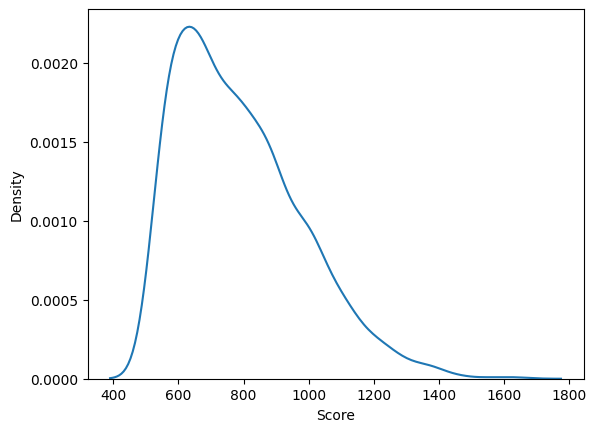

In [48]:
sns.kdeplot(df["Score"])
plt.show()
